In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv("dep4.csv")

df.head(5)

,cmb_1,cmb_2,cmb_3,cmb_4,cmb_5,cmb_6,cmb_7,cmb_8,cmb_9,presc_index_value,sex,age_cat_2008,smoke,townsend_num,PC_event,antidepressants_binary,bmicat,sbpcat,RDDcat1,relapse_bin
0,0,0,1,0,0,0,0,0,0,1,2,1,1,2,0,1,3,1,3,1
1,0,0,1,0,0,0,0,1,0,4,2,1,1,4,0,1,3,2,3,1
2,0,0,0,1,0,1,1,1,0,5,1,1,1,3,0,1,2,1,2,1
3,0,0,0,0,0,0,1,0,0,3,2,3,1,4,0,1,1,2,1,1
4,0,0,0,0,1,0,0,0,0,1,2,1,1,3,0,1,3,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32249 entries, 0 to 32248
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   cmb_1                   32249 non-null  int64
 1   cmb_2                   32249 non-null  int64
 2   cmb_3                   32249 non-null  int64
 3   cmb_4                   32249 non-null  int64
 4   cmb_5                   32249 non-null  int64
 5   cmb_6                   32249 non-null  int64
 6   cmb_7                   32249 non-null  int64
 7   cmb_8                   32249 non-null  int64
 8   cmb_9                   32249 non-null  int64
 9   presc_index_value       32249 non-null  int64
 10  sex                     32249 non-null  int64
 11  age_cat_2008            32249 non-null  int64
 12  smoke                   32249 non-null  int64
 13  townsend_num            32249 non-null  int64
 14  PC_event                32249 non-null  int64
 15  antidepressants_bin

In [4]:
df.describe()

,cmb_1,cmb_2,cmb_3,cmb_4,cmb_5,cmb_6,cmb_7,cmb_8,cmb_9,presc_index_value,sex,age_cat_2008,smoke,townsend_num,PC_event,antidepressants_binary,bmicat,sbpcat,RDDcat1,relapse_bin
count,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000
mean,0.117771,0.245031,0.262055,0.105802,0.145958,0.122670,0.126919,0.171633,0.007411,2.859748,1.514280,3.022512,1.776861,2.770505,0.065645,0.695277,2.033737,1.444138,1.200037,0.215604
std,0.322342,0.430112,0.439759,0.307588,0.353070,0.328064,0.332887,0.377067,0.085769,2.257699,0.499804,2.108179,0.796729,1.350856,0.247665,0.460297,0.791124,0.496877,0.538074,0.411247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,5.000000,2.000000,4.000000,0.000000,1.000000,3.000000,2.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,2.000000,10.000000,3.000000,5.000000,1.000000,1.000000,3.000000,2.000000,3.000000,1.000000


In [5]:
df.iloc[:, :-1].describe()

,cmb_1,cmb_2,cmb_3,cmb_4,cmb_5,cmb_6,cmb_7,cmb_8,cmb_9,presc_index_value,sex,age_cat_2008,smoke,townsend_num,PC_event,antidepressants_binary,bmicat,sbpcat,RDDcat1
count,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000,32249.000000
mean,0.117771,0.245031,0.262055,0.105802,0.145958,0.122670,0.126919,0.171633,0.007411,2.859748,1.514280,3.022512,1.776861,2.770505,0.065645,0.695277,2.033737,1.444138,1.200037
std,0.322342,0.430112,0.439759,0.307588,0.353070,0.328064,0.332887,0.377067,0.085769,2.257699,0.499804,2.108179,0.796729,1.350856,0.247665,0.460297,0.791124,0.496877,0.538074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000,1.000000,2.000000,1.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,5.000000,2.000000,4.000000,0.000000,1.000000,3.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,2.000000,10.000000,3.000000,5.000000,1.000000,1.000000,3.000000,2.000000,3.000000


<AxesSubplot:xlabel='relapse_bin'>

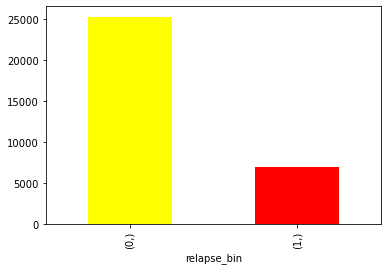

In [6]:
df.iloc[:, -1:].value_counts().plot.bar(color=['yellow', 'red'])

In [7]:
y = df.iloc[:, -1:]

In [8]:
X = df.iloc[:,:-1]

In [9]:
X.head(5)

,cmb_1,cmb_2,cmb_3,cmb_4,cmb_5,cmb_6,cmb_7,cmb_8,cmb_9,presc_index_value,sex,age_cat_2008,smoke,townsend_num,PC_event,antidepressants_binary,bmicat,sbpcat,RDDcat1
0,0,0,1,0,0,0,0,0,0,1,2,1,1,2,0,1,3,1,3
1,0,0,1,0,0,0,0,1,0,4,2,1,1,4,0,1,3,2,3
2,0,0,0,1,0,1,1,1,0,5,1,1,1,3,0,1,2,1,2
3,0,0,0,0,0,0,1,0,0,3,2,3,1,4,0,1,1,2,1
4,0,0,0,0,1,0,0,0,0,1,2,1,1,3,0,1,3,1,1


In [10]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([25296,  6953], dtype=int64))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)

In [12]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (25799, 19), y_train: (25799, 1)


In [13]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (6450, 19), y_test: (6450, 1)


In [14]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000

In [15]:
l2_model = LogisticRegression(random_state=42, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [16]:
l2_model.fit(X_train, y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [17]:
l2_preds = l2_model.predict(X_test)

In [18]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [19]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.9212403100775194,
 'recall': array([1.        , 0.63479511]),
 'precision': array([0.90874798, 1.        ]),
 'f1score': array([0.95219273, 0.7766051 ])}

In [20]:
l2_pred_lre = l2_model.predict(X_test)

In [21]:
l2_prob_lre = l2_model.predict_proba(X_test)

In [22]:
auc = roc_auc_score(label_binarize(y_test,classes=[0,1]),
                    l2_prob_lre[:, 1],average='weighted')
auc

0.8496942405993176

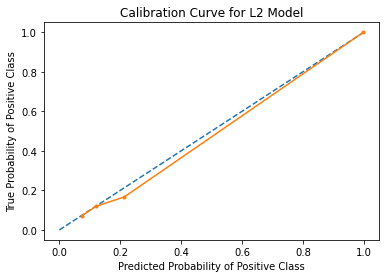

In [23]:
from sklearn.calibration import calibration_curve

y_prob = l2_model.predict_proba(X_test)[:, 1]
true_prob, pred_prob = calibration_curve(y_test, y_prob, n_bins=10)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(pred_prob, true_prob, marker='.')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('True Probability of Positive Class')
plt.title('Calibration Curve for L2 Model')
plt.show()


In [23]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# classification problem is multinomial
multi_class = 'multinomial'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

In [24]:
l1_model = LogisticRegression(random_state=42, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000)

In [25]:
l1_model.fit(X_train, y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   random_state=42, solver='saga')

In [26]:
l1_preds = l1_model.predict(X_test)

In [27]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.9212403100775194,
 'recall': array([1.        , 0.63479511]),
 'precision': array([0.90874798, 1.        ]),
 'f1score': array([0.95219273, 0.7766051 ])}

In [28]:
l1_pred_lre = l1_model.predict(X_test)

In [29]:
l1_prob_lre = l1_model.predict_proba(X_test)

In [30]:
auc = roc_auc_score(label_binarize(y_test,classes=[0,1]),
                    l1_prob_lre[:, 1],average='weighted')
auc

0.8495777858651095

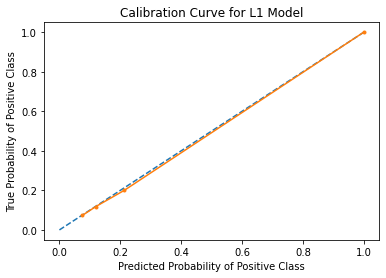

In [32]:
from sklearn.calibration import calibration_curve

y_prob = l1_model.predict_proba(X_test)[:, 1]
true_prob, pred_prob = calibration_curve(y_test, y_prob, n_bins=10)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(pred_prob, true_prob, marker='.')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('True Probability of Positive Class')
plt.title('Calibration Curve for L1 Model')
plt.show()

In [31]:
%matplotlib inline

In [32]:
LR1 = LogisticRegression(C=5, penalty='elasticnet', solver='saga')

In [33]:
LR1.set_params(l1_ratio=0.5, tol=0.3)

LogisticRegression(C=5, l1_ratio=0.5, penalty='elasticnet', solver='saga',
                   tol=0.3)

In [34]:
LR1.fit(X_train, y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=5, l1_ratio=0.5, penalty='elasticnet', solver='saga',
                   tol=0.3)

In [35]:
y_pred_lre = LR1.predict(X_test)

In [36]:
y_prob_lre = LR1.predict_proba(X_test)

In [37]:
precision,recall,fscore, _ = precision_recall_fscore_support(y_test,y_pred_lre,average='weighted')
accuracy = accuracy_score(y_test,y_pred_lre)
auc = roc_auc_score(label_binarize(y_test,classes=[0,1]),
                    y_prob_lre[:, 1],average='weighted')
pd.Series({'precision':precision,'recall':recall,'fscore':fscore,'accuracy':accuracy,'auc':auc})

precision    0.928299
recall       0.921085
fscore       0.914139
accuracy     0.921085
auc          0.834316
dtype: float64

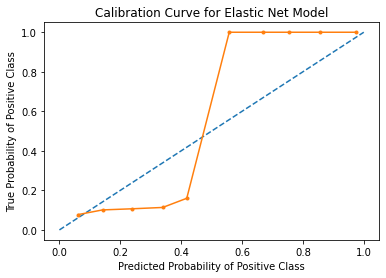

In [40]:
from sklearn.calibration import calibration_curve

y_prob = LR1.predict_proba(X_test)[:, 1]
true_prob, pred_prob = calibration_curve(y_test, y_prob, n_bins=10)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(pred_prob, true_prob, marker='.')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('True Probability of Positive Class')
plt.title('Calibration Curve for Elastic Net Model')
plt.show()

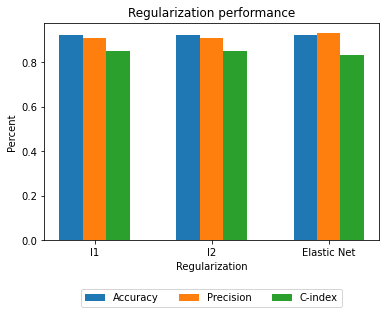

In [41]:
import matplotlib.pyplot as plt
import numpy as np

regularization = ["l1", "l2", "Elastic Net"]
accuracy = [0.92, 0.92, 0.92]
precision = [0.91, 0.91, 0.93]
c_index = [0.85, 0.85, 0.83]

# Create a figure and an axis
fig, ax = plt.subplots()

# Set the width of each bar
width = 0.2

# Plot the bars for each metric
ax.bar([i - width for i in range(len(regularization))], accuracy, width=width, label="Accuracy")
ax.bar([i for i in range(len(regularization))], precision, width=width, label="Precision")
ax.bar([i + width for i in range(len(regularization))], c_index, width=width, label="C-index")

# Add some labels and a title
ax.set_xlabel("Regularization")
ax.set_ylabel("Percent")
ax.set_title("Regularization performance")

# Move the legend to the bottom of the graph
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Set the tick locations in addition to the tick labels
ax.set_xticks(np.arange(len(regularization)))
ax.set_xticklabels(regularization)

# Show the plot
plt.show()


In [38]:
l1_model.coef_

array([[-9.27268579e-03,  4.92774497e-02,  2.27805090e-02,
         1.76736901e-01,  1.57136761e-01,  8.60691140e-02,
         4.68709576e-02,  0.00000000e+00, -5.85248677e-02,
        -2.66883400e-02, -2.02590739e-03, -5.31737902e-02,
         3.16688158e-02, -3.28634369e-02, -1.84012146e-01,
         1.15409338e-01,  1.51185285e-02, -1.76125545e-03,
         4.73977208e+00]])

In [39]:
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

In [40]:
feature_cols = list(df.iloc[:, :-1].columns)

In [41]:
l1_model.coef_

array([[-9.27268579e-03,  4.92774497e-02,  2.27805090e-02,
         1.76736901e-01,  1.57136761e-01,  8.60691140e-02,
         4.68709576e-02,  0.00000000e+00, -5.85248677e-02,
        -2.66883400e-02, -2.02590739e-03, -5.31737902e-02,
         3.16688158e-02, -3.28634369e-02, -1.84012146e-01,
         1.15409338e-01,  1.51185285e-02, -1.76125545e-03,
         4.73977208e+00]])

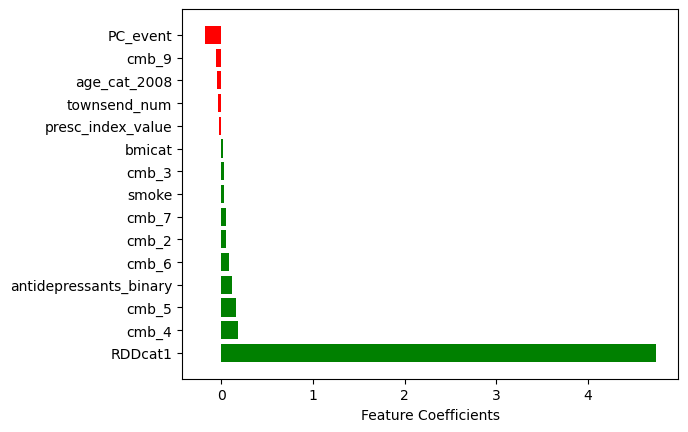

In [47]:
coef_dict1 = get_feature_coefs(l1_model, 0, feature_cols)
visualize_coefs(coef_dict1)

In [42]:
l2_model.coef_

array([[-1.13124295e-02,  5.06685275e-02,  2.43846123e-02,
         1.78783272e-01,  1.58353470e-01,  8.80667903e-02,
         4.88052525e-02,  1.02292573e-03, -1.01921451e-01,
        -2.66879013e-02, -2.23836199e-03, -5.30926249e-02,
         3.20183194e-02, -3.30464273e-02, -1.87899011e-01,
         1.16529416e-01,  1.58128353e-02, -2.58822102e-03,
         4.18851927e+00]])

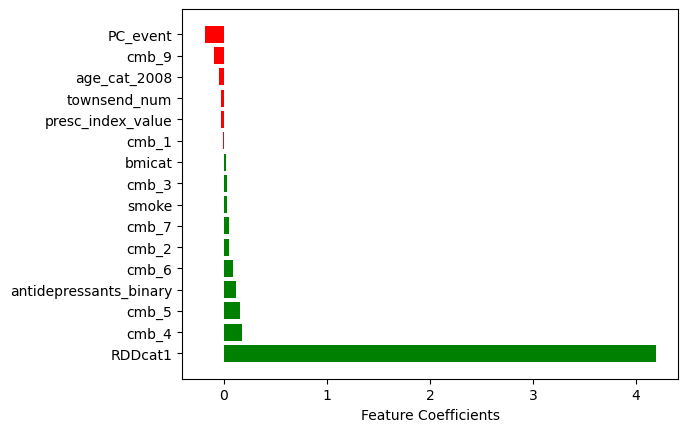

In [48]:
coef_dict2 = get_feature_coefs(l2_model, 0, feature_cols)
visualize_coefs(coef_dict2)

In [43]:
LR1.coef_

array([[ 3.87249695e-03,  9.18130983e-02,  1.27022147e-01,
         3.34864853e-01,  2.18182211e-01,  5.24139363e-02,
         2.49307451e-01, -3.38033756e-02, -1.85233825e-02,
        -1.02938890e-01, -7.18284836e-01, -1.48618397e-01,
        -2.93662992e-01, -1.67682683e-01, -1.31272545e-01,
        -7.16969934e-02, -3.00975691e-01, -5.23692737e-01,
         4.10595191e+00]])

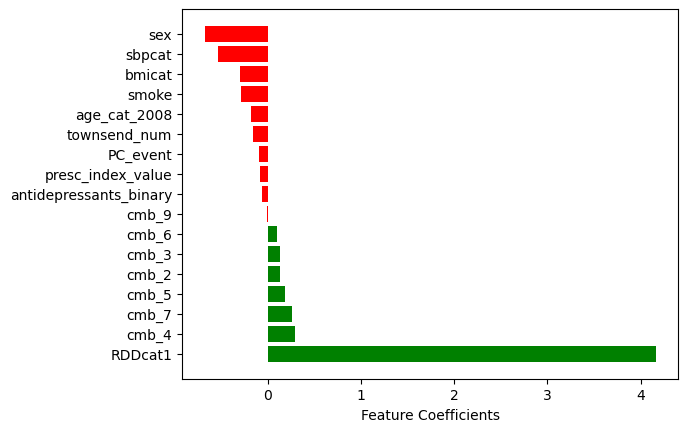

In [49]:
coef_dict3 = get_feature_coefs(LR1, 0, feature_cols)
visualize_coefs(coef_dict3)